

الاسم : عبدالرحمن اسامه عبدالاله النجار
    Name: Abdelrahman osama Elnaggar
    Email: nag.abdelrahman95@gmail.com
    code:1300729
    Bench number:43791    





الاسم : عبدالرحمن فيصل فاروق محمد
    Name: Abdelrahman Faysal Farouk Mohammed 
    Email: abdo.faysal@yahoo.com
    code:1300753
    Bench number:43793    

Filters we have made using opencv 
1-Amaro filter 
2-1977 filter
3-HUDSON 
4-WILLOW 
5-LO-FI
the pictures we use are from this site http://filterfakers.com/filterguide to see if we made the correct colors and try to make the exact filter.
NOTE: By printing the image with opencv the image will be clearer.


In [1]:
import cv2 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage
from skimage import io
from skimage import filters
import numpy as np

def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

def LOFI(img):

    img3=adjust_gamma(img,0.233)#309068
    hist,bins = np.histogram(img3.flatten(),256,[0,256])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')

    img3 = cdf[img3]
    #imag3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
    plt.imshow(img3)
        #imgplot = plt.imshow(y)
    plt.show()

def WILLOW (img):
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    for i in range(0, img.shape[0] - 1):
        for j in range(0, img.shape[1] - 1):
            if img2[i, j]+40>255:
                img2[i, j]=255
            else:
                img2[i, j] =img2[i, j]+40





    
    plt.imshow(img2, cmap='gray')
        #imgplot = plt.imshow(y)
    plt.show()

def HUDSON(img):

    mask=img


    for i in range(0,img.shape[0]-1):

        for j in range(0,img.shape[1]-1):
            if mask[i,j][0]+30<255 and mask[i,j][1]+8<255 and mask[i,j][2]+8<255:

                mask[i,j][0]=mask[i,j][0]+30
                mask[i,j][1]=mask[i,j][1]+8
                mask[i,j][2]=mask[i,j][2]+8




    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    plt.imshow(mask)
        #imgplot = plt.imshow(y)
    plt.show()

























def insta_like(image,instafilter):
    if(instafilter=="Amaro"):
        imag = cv2.imread(image)
        imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
        height, width, channels = imag.shape
        i=0
        j=0

        def add(x):
            if(x>=255):
                return 220
            if(x<=40):
                return 10
            else:
                return x

        for i in range(height):
            for j in range(width):
                   imag.itemset((i,j,0),add(imag.item(i,j,0)))


        for k in range(height):
            for l in range(width):
                   imag.itemset((k,l,2),add(imag.item(k,l,2)+20))    

        for t in range(height):
            for q in range(width):
                   imag.itemset((t,q,1),add(imag.item(t,q,1)))



        b = cv2.imread('last.jpg',1)
        y = cv2.addWeighted(imag,1,b,0.2,0)

        #cv2.imshow("Amaro filter",y)
        plt.imshow(y)
        #imgplot = plt.imshow(y)
        plt.show()
 ############################################################       

    if(instafilter=="1977"):
        
        imag = cv2.imread(image)
        imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)

        height, width, channels = imag.shape
        i=0
        j=0

        def add(x):
            if(x>=255):
                return 220
            if(x<=40):
                return 15
            else:
                return x

        for i in range(height):
            for j in range(width):
                   imag.itemset((i,j,0),add(imag.item(i,j,0)+55))


        for k in range(height):
            for l in range(width):
                   imag.itemset((k,l,2),add(imag.item(k,l,2)+10))    

        for t in range(height):
            for q in range(width):
                   imag.itemset((t,q,1),add(imag.item(t,q,1)+10))

        b = cv2.imread('blaa.jpg',1)
        y = cv2.addWeighted(imag,0.7,b,1,0)
        plt.imshow(y)
        #imgplot = plt.imshow(y)
        plt.show()
  ####################################################################
    if(instafilter=="HUDSON"):
        imag = cv2.imread(image)
        HUDSON(imag)
#######################################################################
    if(instafilter=="WILLOW"):
        imag = cv2.imread(image)
        #imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
        
        WILLOW(imag)
#########################################################################
    if(instafilter=="LO-FI"):
        imag = cv2.imread(image)
        imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
        LOFI(imag) 
    
    
    if(instafilter=="Normal"):
        
        imag = cv2.imread(image)
        imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
        plt.imshow(imag)
        plt.show()
        
        
        
        
        

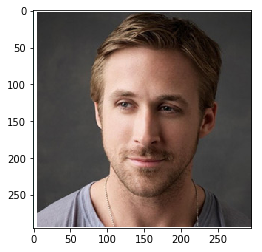

In [2]:
insta_like('test.png','Normal')


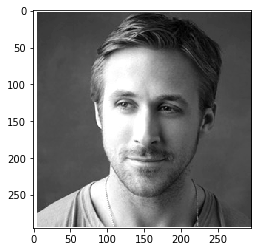

In [3]:
#insta_like('test.png','1977')
insta_like('test.png','WILLOW')


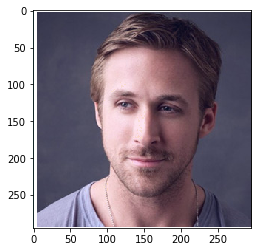

In [4]:
insta_like('test.png','HUDSON')


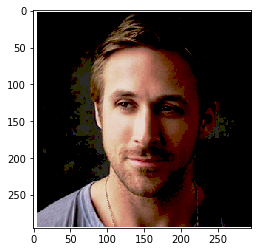

In [7]:
insta_like('test.png','LO-FI')


In [6]:
insta_like('test.png','Amaro')

error: C:\projects\opencv-python\opencv\modules\core\src\arithm.cpp:659: error: (-209) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function cv::arithm_op
